### Name: Carl Victor A. Villaceran
#### Brodley,Carla. (2014). AAAI 2014 Accepted Papers. UCI Machine Learning Repository. https://doi.org/10.24432/C5S31F.


<h2>Assignment 2</h2>
<br>
<p>Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.
</p>

In [4]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Read CSV file
# CSV Format: title,authors,groups,keywords,topics,abstract
# Update the file path as needed
df = pd.read_csv(r'E:\Github\DATA_ANALYTICS\Assignment\Assignment2\aaai+2014+accepted+papers\[UCI] AAAI-14 Accepted Papers - Papers.csv')

# Check head of the data and the columns and shape
print(df.shape)


(398, 6)


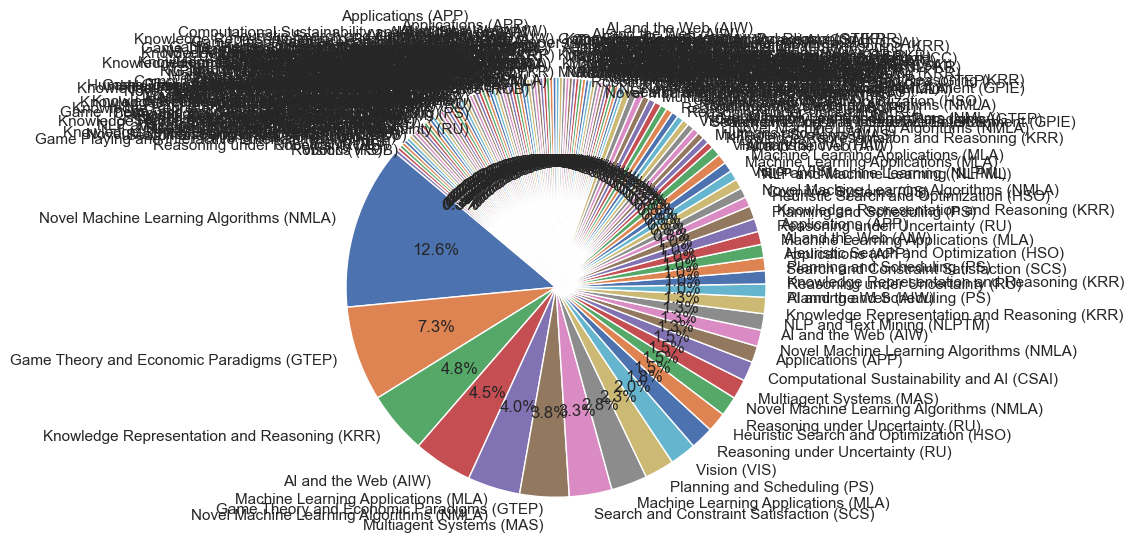

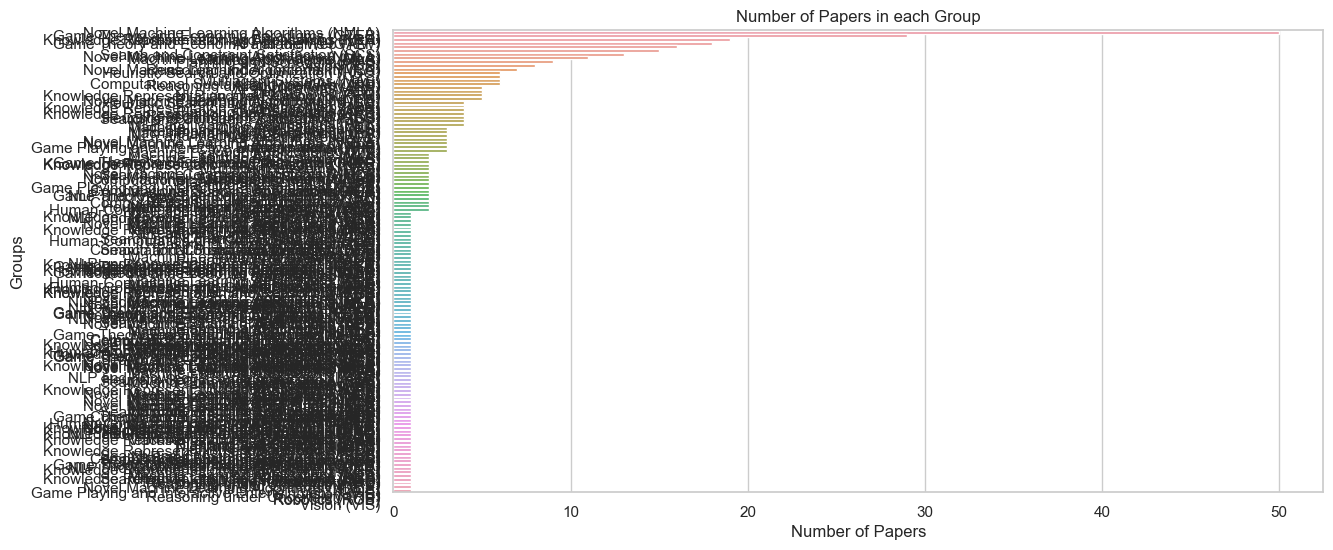

In [8]:
# Use a circular chart to plot the number of papers in each group
# Get the count of papers in each group
group_counts = df['groups'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Number of Papers in each Group')
plt.show()

# Use the Seaborn library to plot a bar chart of the number of papers in each group
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(y='groups', data=df, order = df['groups'].value_counts().index)
plt.title('Number of Papers in each Group')
plt.xlabel('Number of Papers')
plt.ylabel('Groups')
plt.show()

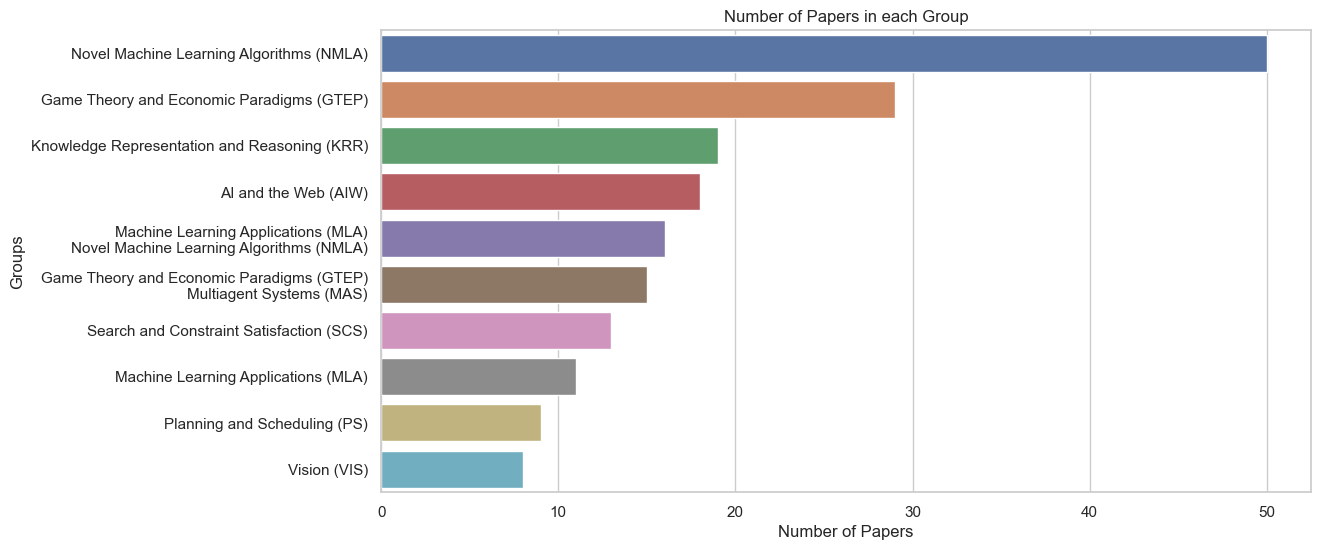

In [9]:
# Now let's plot the number of papers in each group for the top 10 groups
plt.figure(figsize=(12, 6))
sns.countplot(y='groups', data=df, order = df['groups'].value_counts().index[:10])
plt.title('Number of Papers From the Group with more than 10 Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Groups')
plt.show()


In [12]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ---------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ----- -------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   --------- ---------------------------- 71.7/300.2 kB 393.8 kB/s eta 0:00:01
   --------------- --------------------- 122.9/300.2 kB 554.9 kB/s eta 0:00:01
   --------------------- --------------- 174.1/300.2 kB 655.4 kB/s eta 0:00:01
   ------------------------------ ------ 245.8/300.2 kB 838.1 kB/s eta 0:00:01
   ------------------------------------- 300.2/300.2 kB 929.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


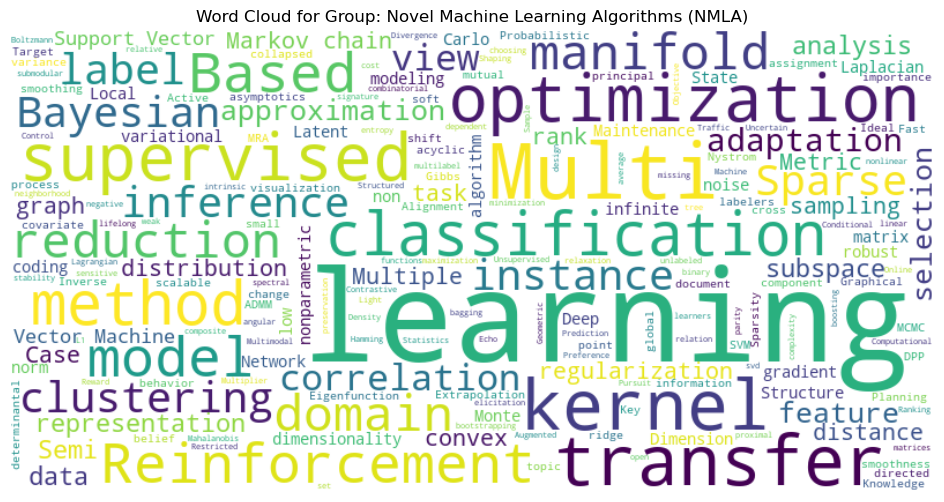

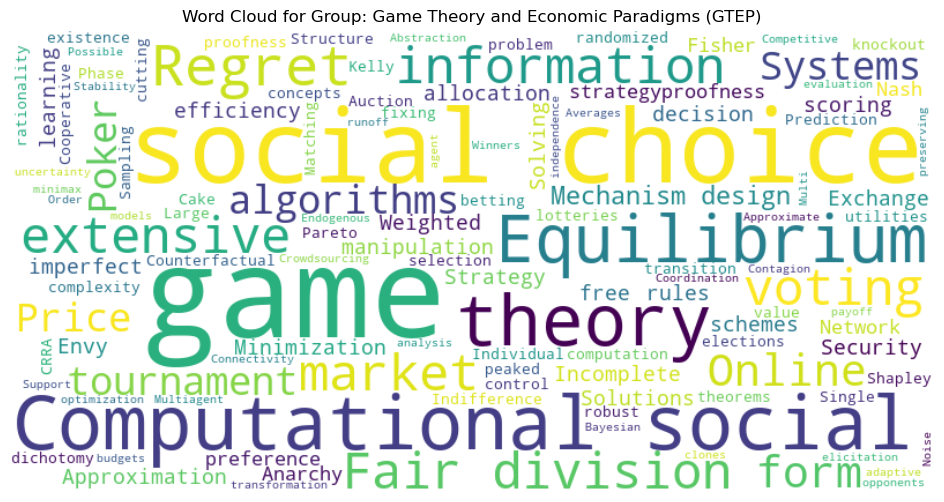

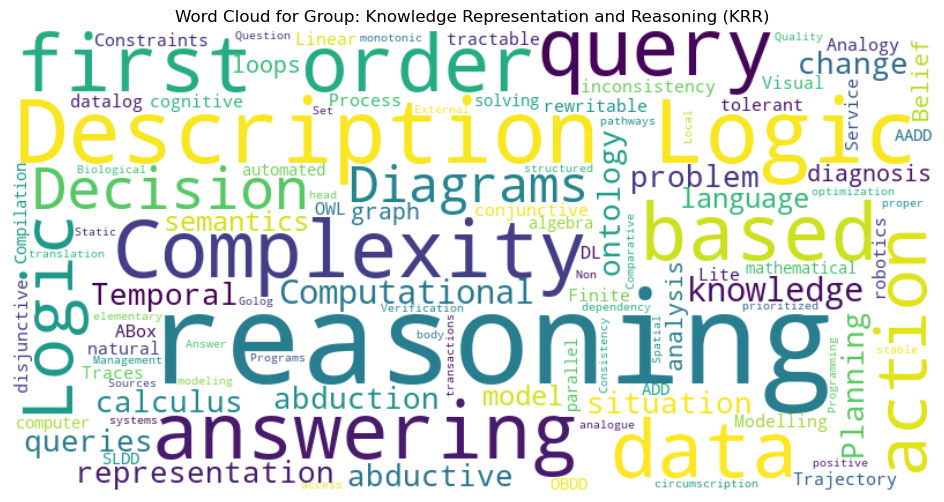

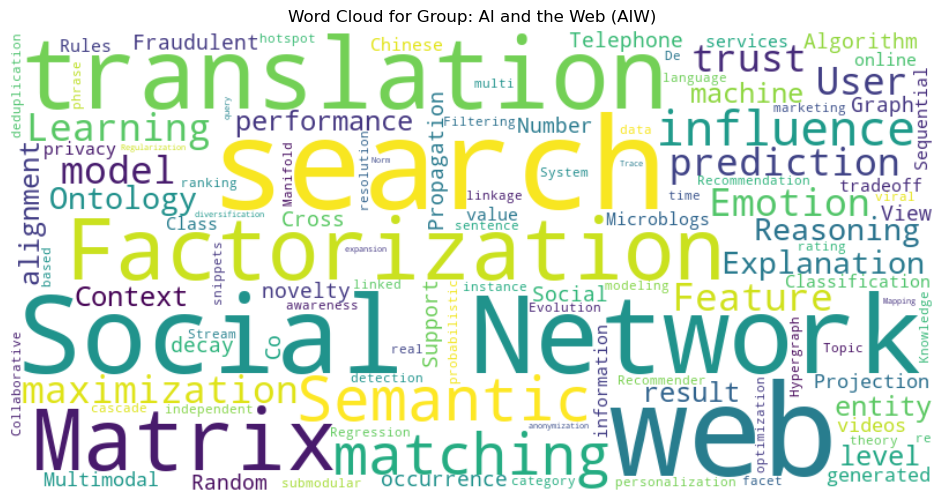

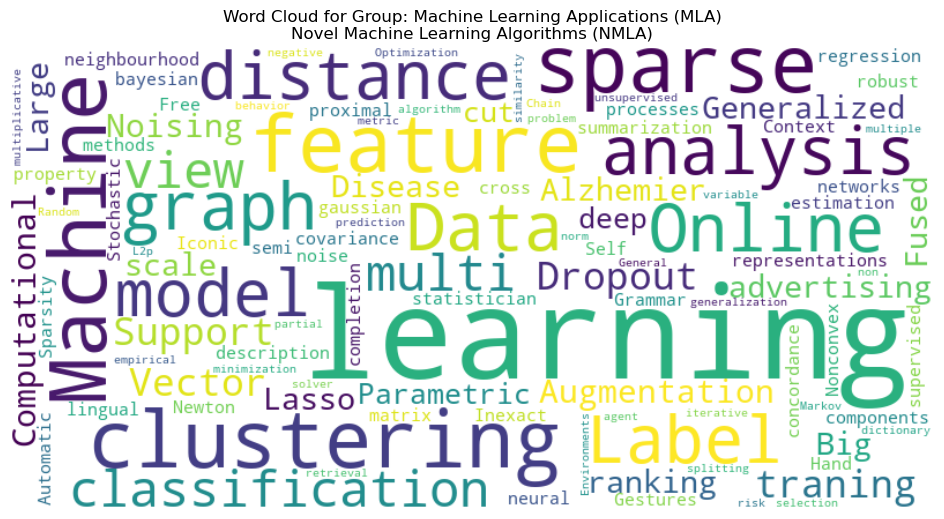

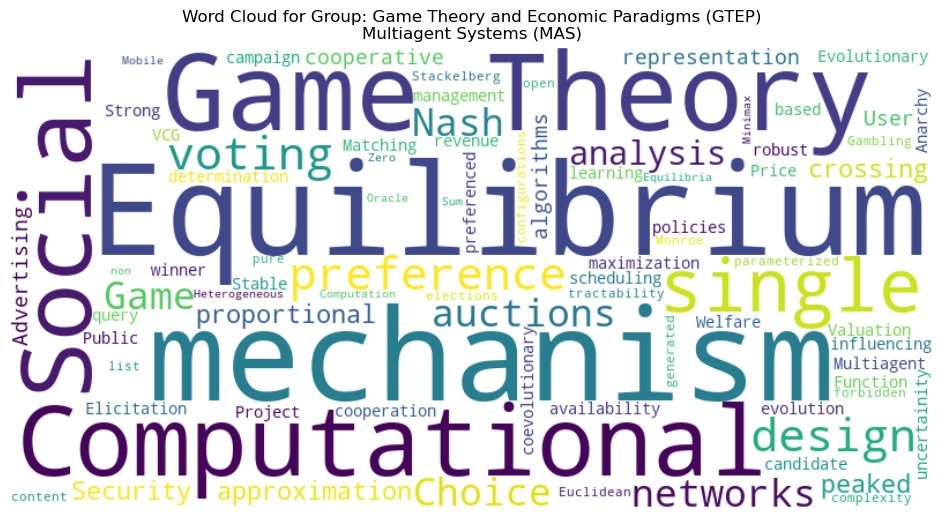

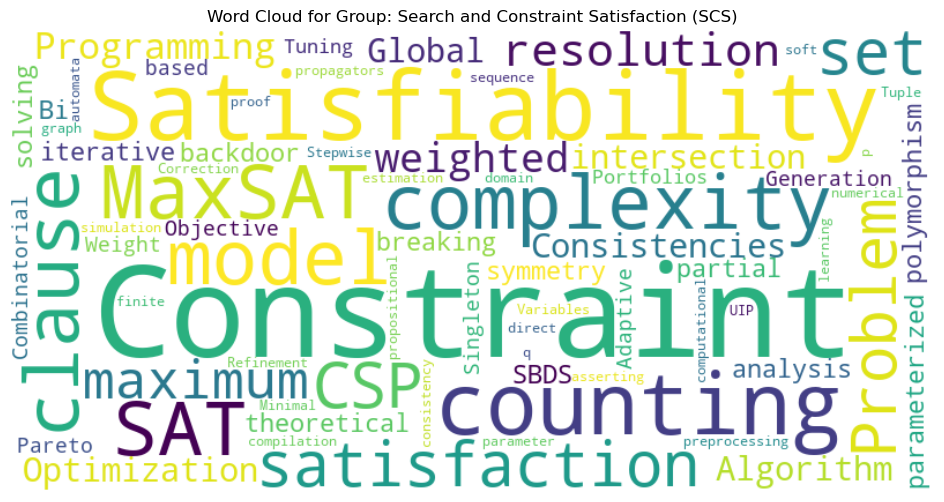

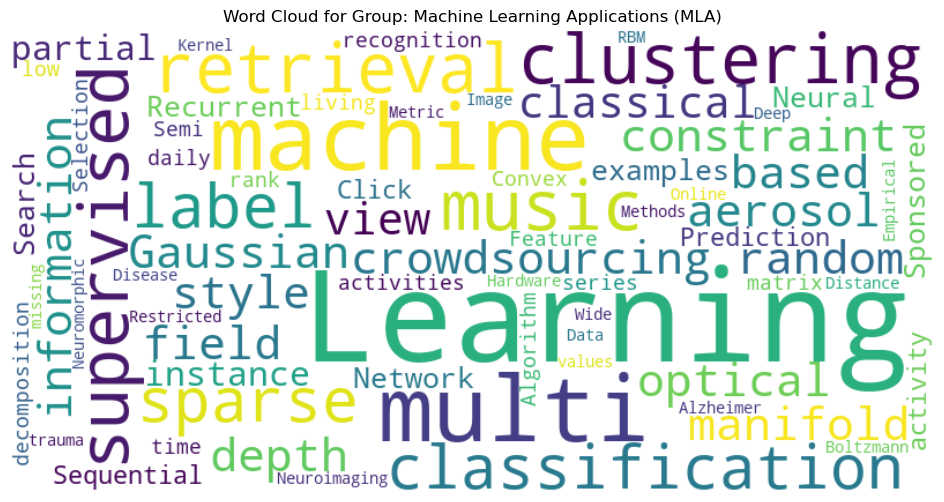

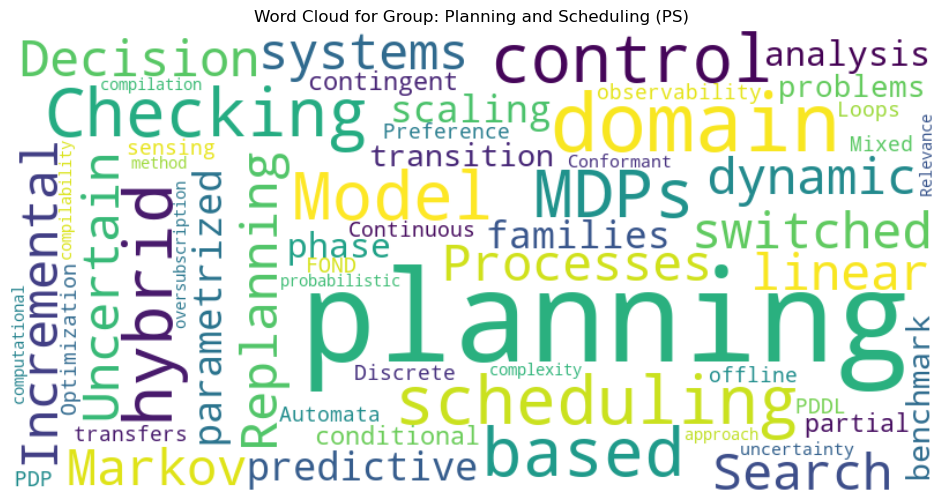

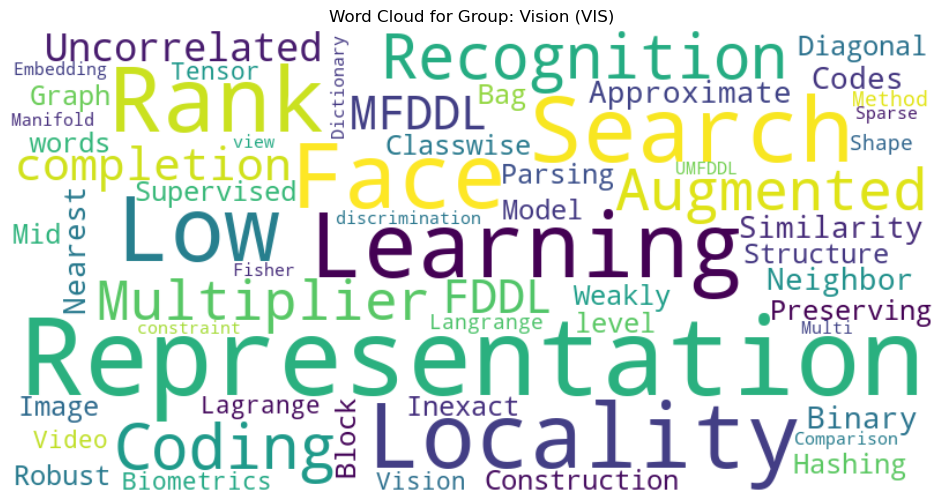

In [6]:
# Now for each group, let's see the common keywords used in the papers using a word cloud
from wordcloud import WordCloud

# Get the 10 groups with the most papers
top_groups = df['groups'].value_counts().index[:10]

# Create a word cloud for each group
for group in top_groups:
    # Get the keywords for the group
    keywords = df[df['groups'] == group]['keywords']
    keywords = ' '.join(keywords)
    
    # Create a word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(keywords)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Group: {group}')
    plt.show()

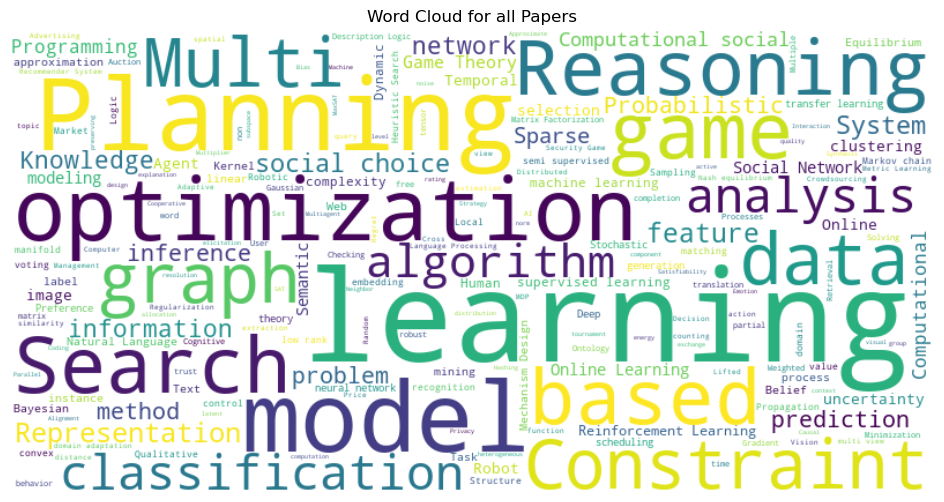

In [7]:
# Now lets do the word cloud for every paper
# Get all the keywords
all_keywords = ' '.join(df['keywords'])

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_keywords)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for all Papers Keywords')
plt.show()

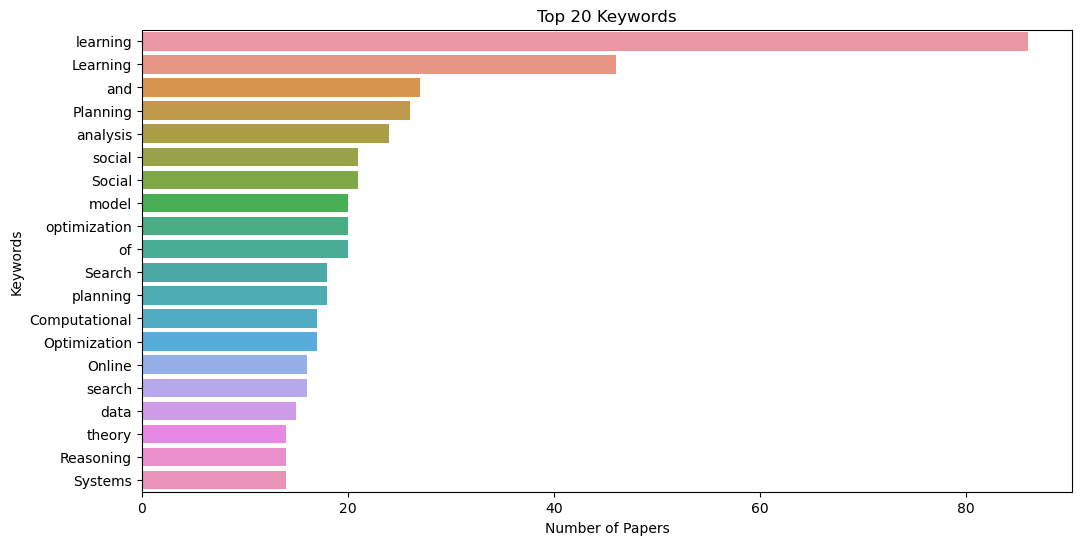

In [11]:
#Lets count the popular keywords and plot them
from collections import Counter

# Split the keywords and count them
keywords = all_keywords.split()
keyword_counts = Counter(keywords)

# Get the top 20 keywords
top_keywords = keyword_counts.most_common(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=[keyword[1] for keyword in top_keywords], y=[keyword[0] for keyword in top_keywords])
plt.title('Top 20 Keywords')
plt.xlabel('Number of Papers')
plt.ylabel('Keywords')
plt.show()

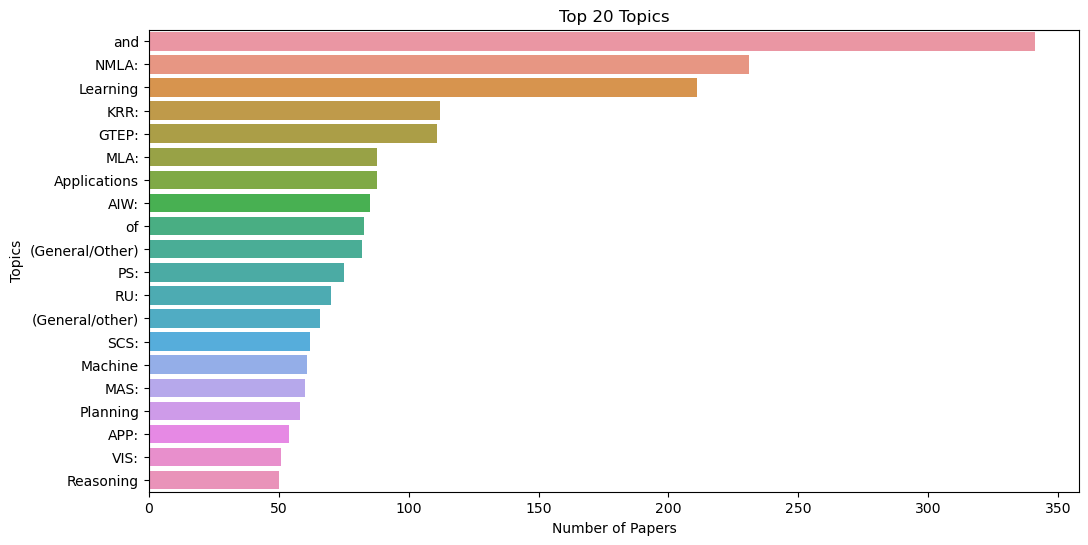

In [15]:
# Convert float values to strings in the 'topics' column
df['topics'] = df['topics'].astype(str)

# Now let's do a bar chart for the top 20 topics
# Get all the topics
all_topics = ' '.join(df['topics'])

# Split the topics and count them
topics = all_topics.split()
topic_counts = Counter(topics)

# Get the top 20 topics
top_topics = topic_counts.most_common(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=[topic[1] for topic in top_topics], y=[topic[0] for topic in top_topics])
plt.title('Top 20 Topics')
plt.xlabel('Number of Papers')
plt.ylabel('Topics')
plt.show()


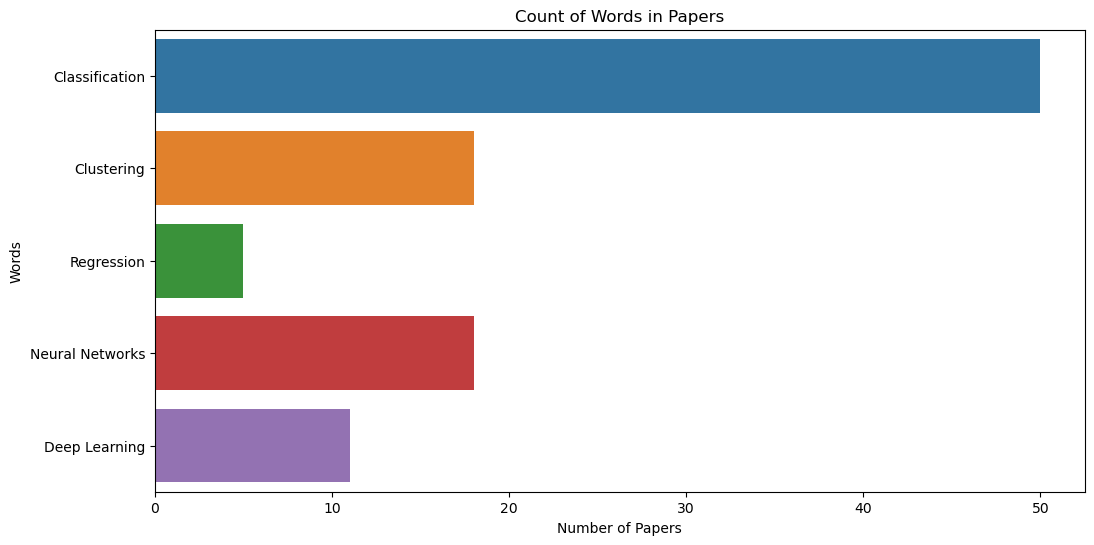

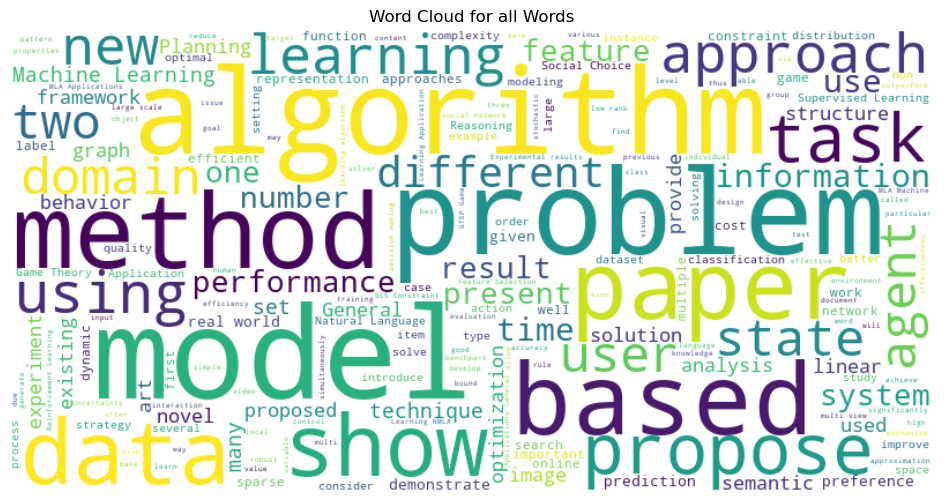

In [16]:
# Get all words from title, keywords, topics and abstract
# Count the how many times "Classification", "Clustering", "Regression", "Neural Networks" and "Deep Learning" appear
# Plot the results
# Convert float values to strings in the 'topics' column
df['title'] = df['title'].astype(str)
df['keywords'] = df['keywords'].astype(str)
df['topics'] = df['topics'].astype(str)
df['abstract'] = df['abstract'].astype(str)

# Get all the words
all_words = ' '.join(df['title']) + ' ' + ' '.join(df['keywords']) + ' ' + ' '.join(df['topics']) + ' ' + ' '.join(df['abstract'])

# Count the words
words = all_words.split()
word_counts = Counter(words)

# Get the counts for the words
classification_count = word_counts['Classification']
clustering_count = word_counts['Clustering']
regression_count = word_counts['Regression']
neural_networks_count = word_counts['Neural']
deep_learning_count = word_counts['Deep']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=[classification_count, clustering_count, regression_count, neural_networks_count, deep_learning_count], y=['Classification', 'Clustering', 'Regression', 'Neural Networks', 'Deep Learning'])
plt.title('Count of Words in Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Words')
plt.show()

# Now with all the words give a word cloud
# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')
plt.title('Word Cloud for all Words')
plt.show()

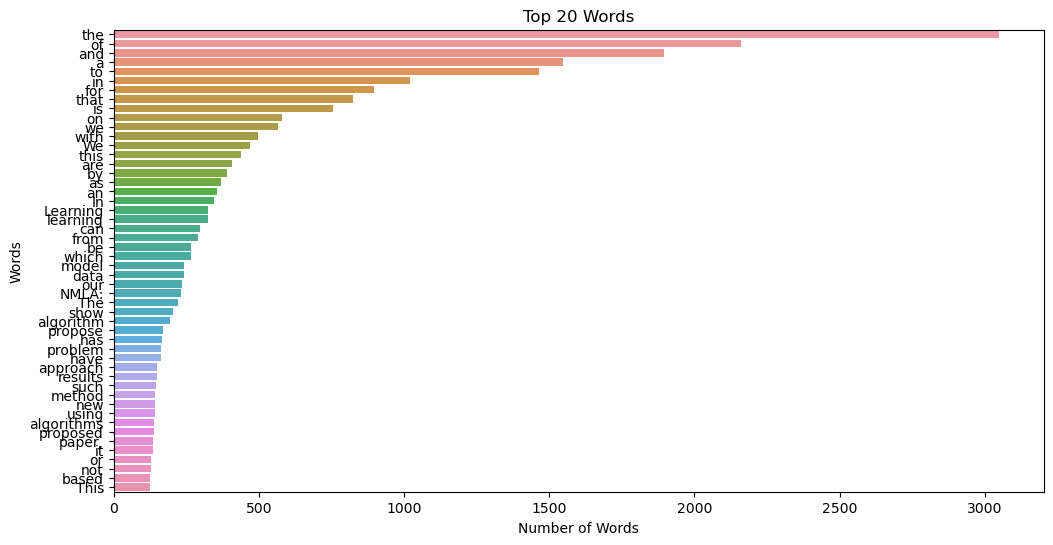

In [18]:
#From the word count, show the top 20 words
# Get the top 20 words
top_words = word_counts.most_common(50)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words])
plt.title('Top 20 Words')
plt.xlabel('Number of Words')
plt.ylabel('Words')
plt.show()
